# Removendo outliers do dataframe

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
plt.rc("figure", figsize=(14,6))


In [8]:
dados = pd.read_csv("./output/dados_residenciais_tratados_novaColuna.csv",sep=";")

In [7]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


Tecnica de reção de outliers utilizada é o blox-lot
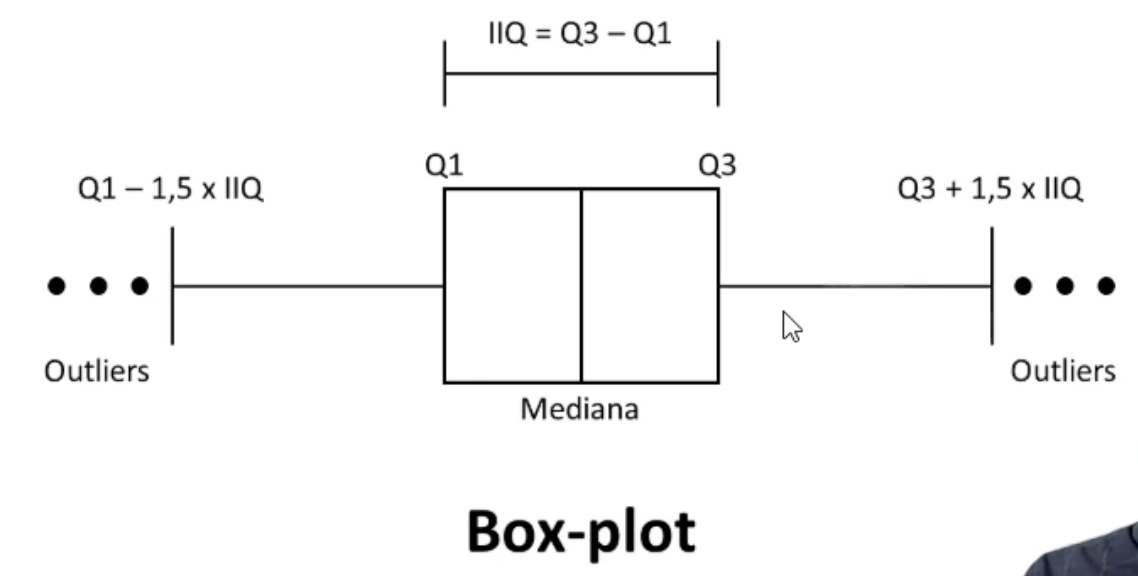

## Calculando as variaveis de um bloxplot

<AxesSubplot: >

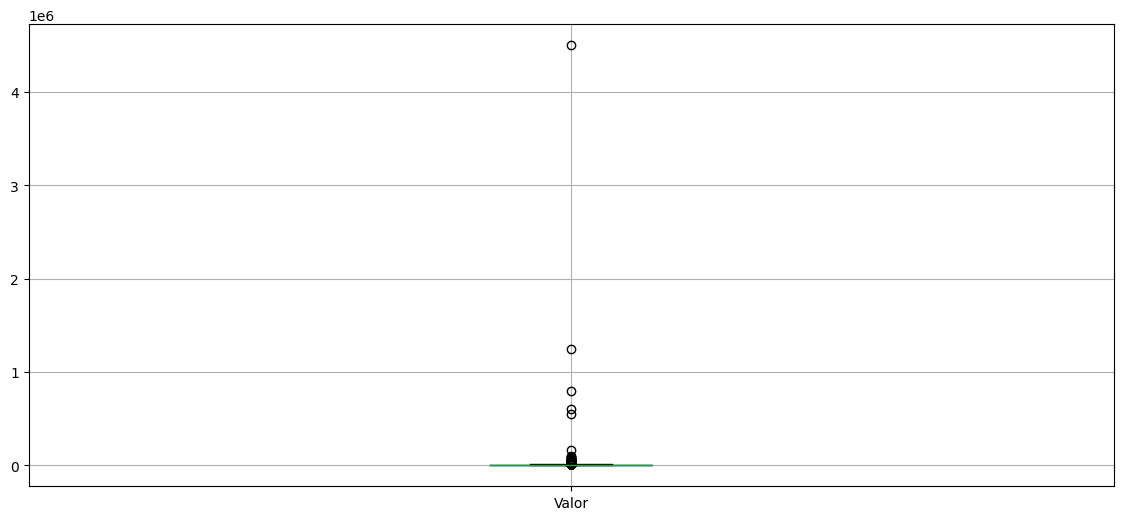

In [26]:
dados[["Valor"]].boxplot()

In [11]:
valores = dados["Valor"]
valores

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21821     900.0
21822     800.0
21823    1800.0
21824    1400.0
21825    3000.0
Name: Valor, Length: 21826, dtype: float64

In [13]:
q1 = valores.quantile(.25)
q3 = valores.quantile(.75)
print(q1,q3)

1600.0 5500.0


In [14]:
iiq = q3-q1
iiq

3900.0

In [15]:
outlier_superior = q3 + 1.5 * iiq
outlier_superior

11350.0

In [16]:
outlier_inferior = q1 - 1.5 * iiq
outlier_inferior

-4250.0

In [18]:
selecao = (dados["Valor"] >= outlier_inferior) & (dados["Valor"]<=outlier_superior)
dados_valores_tratados = dados[selecao]

<AxesSubplot: >

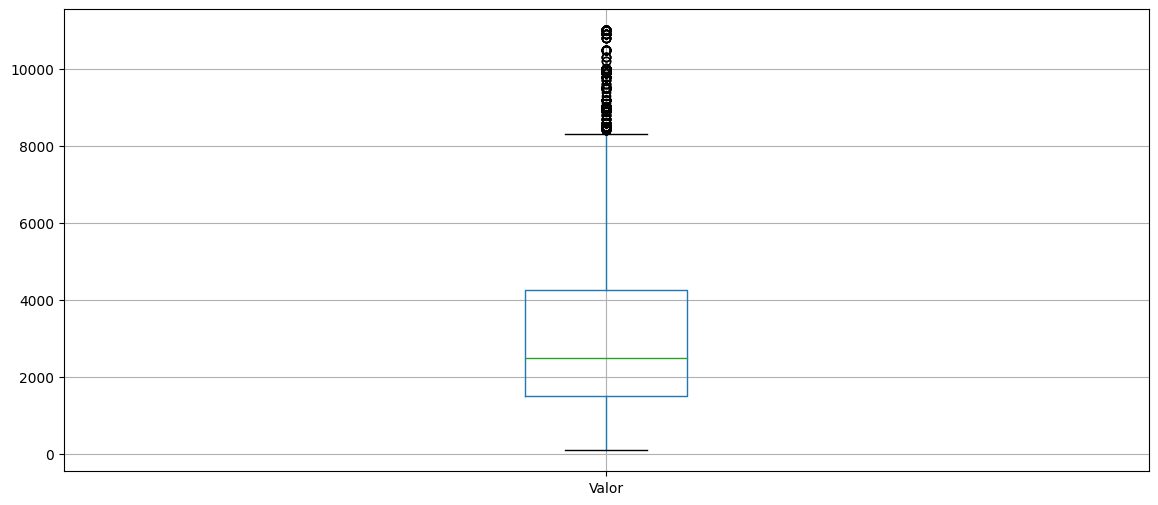

In [24]:
dados_valores_tratados[["Valor"]].boxplot()

## Realizando o tratamento de todos os tipos de imoveis

<AxesSubplot: title={'center': 'Valor'}, xlabel='Tipo'>

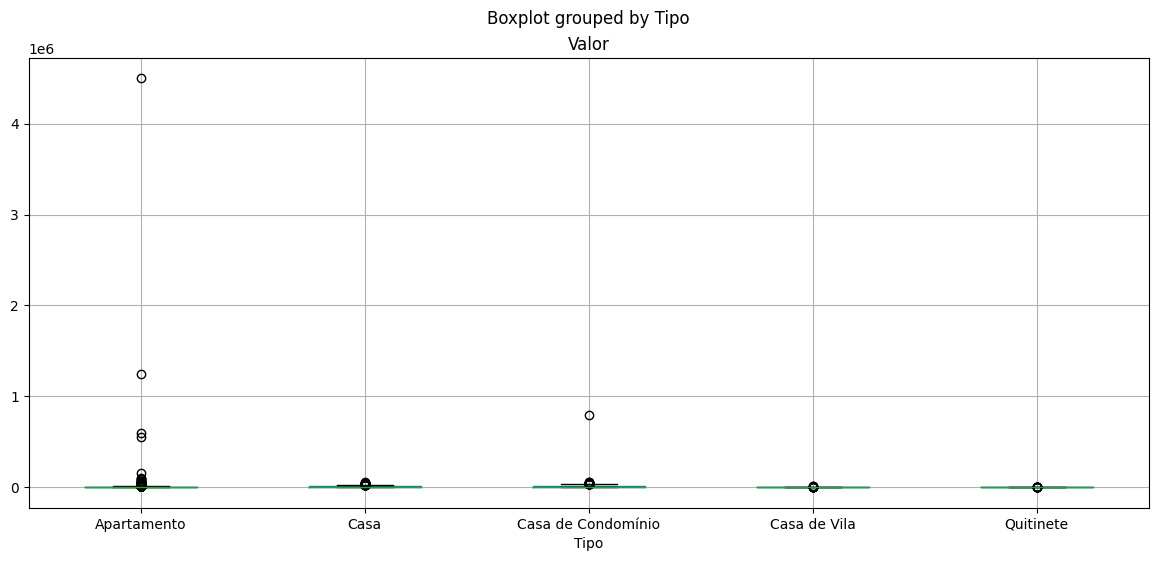

In [30]:
dados.boxplot("Valor", by="Tipo")

In [40]:
#o groupby pega o df todo, mas nesse caso so interessa a coluna valor
grupo_tipo = dados.groupby(by="Tipo")["Valor"]
grupo_tipo

In [41]:
#Valor calculado para cada agrupamento
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [42]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [43]:
#Para visualizar de um valor em especifico, basta passar o tipo
Q1["Apartamento"]

1700.0

In [64]:
grupo_tipo.groups.keys()

dict_keys(['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila', 'Quitinete'])

In [74]:
dados_tratados = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    selecao_tipo = dados["Tipo"] == tipo
    selecao_not_outliers = (dados["Valor"]>=limite_inferior[tipo]) & (dados["Valor"]<=limite_superior[tipo])

    selecao = selecao_tipo & selecao_not_outliers
    
    dados_temp_tratados = dados[selecao]
    dados_tratados = pd.concat([dados_tratados, dados_temp_tratados])

<AxesSubplot: title={'center': 'Valor'}, xlabel='Tipo'>

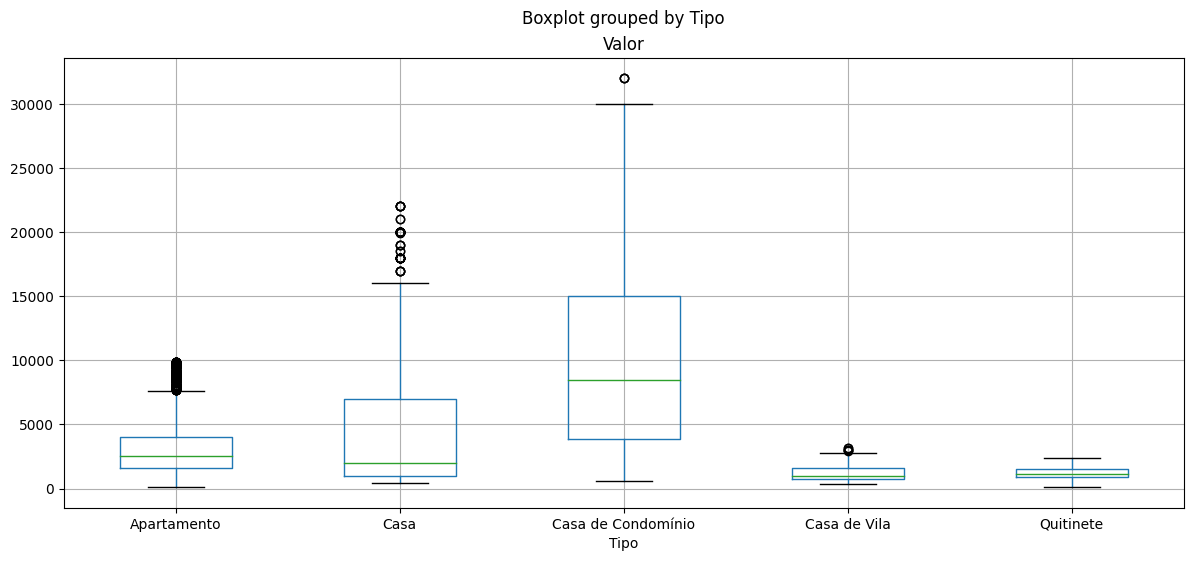

In [75]:
dados_tratados.boxplot("Valor", by="Tipo")